In [89]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [90]:
df = pd.read_csv('Live_20210128.csv')
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [91]:
df.drop(columns=df.columns[-10:], axis=1,  inplace=True)
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares
0,1,video,4/22/2018 6:00,529,512,262
1,2,photo,4/21/2018 22:45,150,0,0
2,3,video,4/21/2018 6:17,227,236,57
3,4,photo,4/21/2018 2:29,111,0,0
4,5,photo,4/18/2018 3:22,213,0,0
...,...,...,...,...,...,...
7045,7046,photo,9/24/2016 2:58,89,0,0
7046,7047,photo,9/23/2016 11:19,16,0,0
7047,7048,photo,9/21/2016 23:03,2,0,0
7048,7049,photo,9/20/2016 0:43,351,12,22


In [92]:
df = df.drop(df.columns[[0, 1, 2]], axis=1)
df

,num_reactions,num_comments,num_shares
0,529,512,262
1,150,0,0
2,227,236,57
3,111,0,0
4,213,0,0
...,...,...,...
7045,89,0,0
7046,16,0,0
7047,2,0,0
7048,351,12,22


In [93]:
df.shape

(7050, 3)

In [94]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   num_reactions  7050 non-null   int64
 1   num_comments   7050 non-null   int64
 2   num_shares     7050 non-null   int64
dtypes: int64(3)
memory usage: 165.4 KB


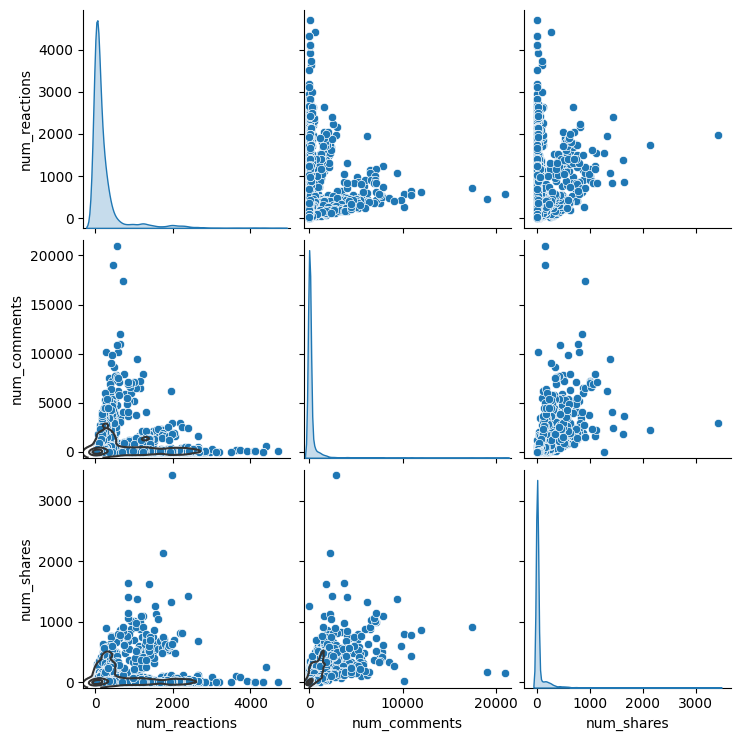

In [95]:
g = sns.pairplot(df, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")

In [96]:
sc = StandardScaler().fit(df)
X = sc.transform(df)
X[0:5]

array([[ 0.64610394,  0.32335035,  1.6868788 ],
       [-0.17319166, -0.25220622, -0.3041444 ],
       [-0.00673846,  0.01308938,  0.12901714],
       [-0.25749912, -0.25220622, -0.3041444 ],
       [-0.03700268, -0.25220622, -0.3041444 ]])

In [97]:
from sklearn.neighbors import NearestNeighbors

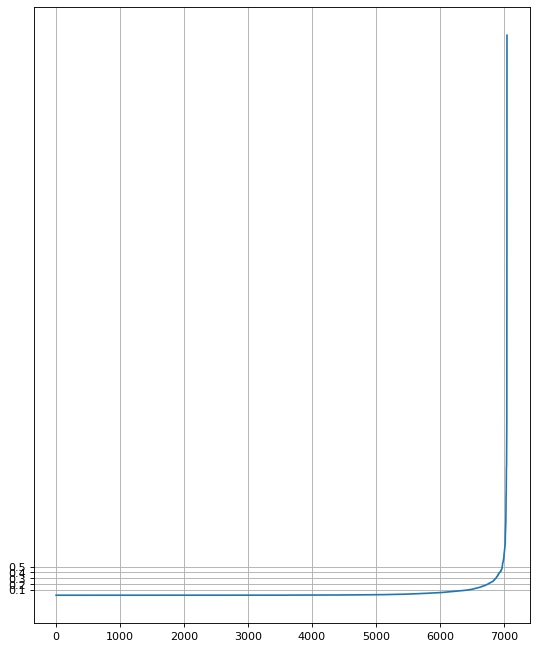

In [98]:
neighbours = NearestNeighbors(n_neighbors=2)
distances, indices = neighbours.fit(X).kneighbors(X)

distances = distances[:, 1]
distances = np.sort(distances, axis=0)
plt.figure(figsize=(8, 10), dpi=80)
x_ticks = [0.1, 0.2, 0.3, 0.4, 0.5]

plt.yticks(ticks=x_ticks, labels = x_ticks)
plt.grid()
plt.plot(distances)

In [99]:
epsilon = 0.5
minimum_samples = 5
db = DBSCAN(eps=epsilon, min_samples=minimum_samples).fit(X)
y_dbscan = DBSCAN(eps=epsilon, min_samples=minimum_samples).fit_predict(X)
labels = db.labels_
labels

array([-1,  0,  0, ...,  0,  0,  0])

In [100]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

array([False,  True,  True, ...,  True,  True,  True])

In [101]:
n_clusters_ = len(set(labels))-(1 if -1 in labels else 0)
n_clusters_

7

In [102]:
unique_labels = set(labels)
unique_labels

{-1, 0, 1, 2, 3, 4, 5, 6}

In [103]:
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

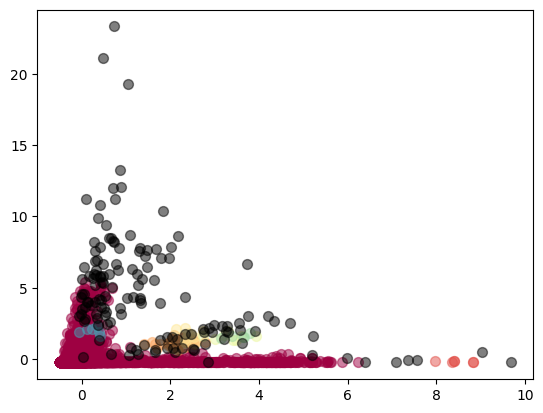

In [104]:
for k, col in zip(unique_labels, colors):
    if k== -1:
        #noise
        col = 'k'
        
    class_member_mask = (labels==k)

    #plot datapoints of clusters
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:,0], xy[:,1], s=50, c=[col], marker=u'o', alpha=0.5)
    
    #plot the outliers
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:,0], xy[:,1], s=50, c=[col], marker=u'o', alpha=0.5)
    

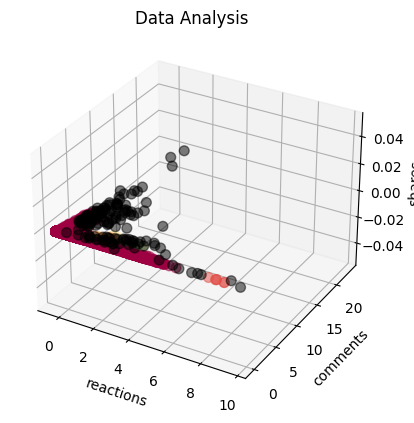

In [105]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_title("Data Analysis ")
ax.set_xlabel("reactions")
ax.set_ylabel("comments")
ax.set_zlabel("shares")

for k, col in zip(unique_labels, colors):
    if k== -1:
        #noise
        col = 'k'
        
    class_member_mask = (labels==k)

    #plot datapoints of clusters
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:,0], xy[:,1], s=50, c=[col], marker=u'o', alpha=0.5)
    
    #plot the outliers
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:,0], xy[:,1], s=50, c=[col], marker=u'o', alpha=0.5)


# ax.scatter(X[:,0], X[:,1], X[:,2], c=labels.astype(float))
plt.show()

In [106]:
from sklearn.decomposition import PCA

In [107]:
pca = PCA(n_components=2)
df_reduced = pca.fit_transform(df)
sum(pca.explained_variance_ratio_)

0.9905277643419854

In [108]:
df_reduced

array([[ 337.82653736,  273.17583238],
       [-234.40991346,  -56.28253295],
       [  12.82596109,   -3.76571577],
       ...,
       [-250.15321016, -203.28227586],
       [-199.03552492,  142.83190791],
       [-248.55760577, -188.38365327]])

In [109]:
sc = StandardScaler().fit(df_reduced)
X_reduced = sc.transform(df_reduced)
X_reduced[0:5]

array([[ 0.37645507,  0.59947355],
       [-0.26121335, -0.12350979],
       [ 0.01429254, -0.00826371],
       [-0.26583628, -0.20851533],
       [-0.25374553,  0.01380685]])

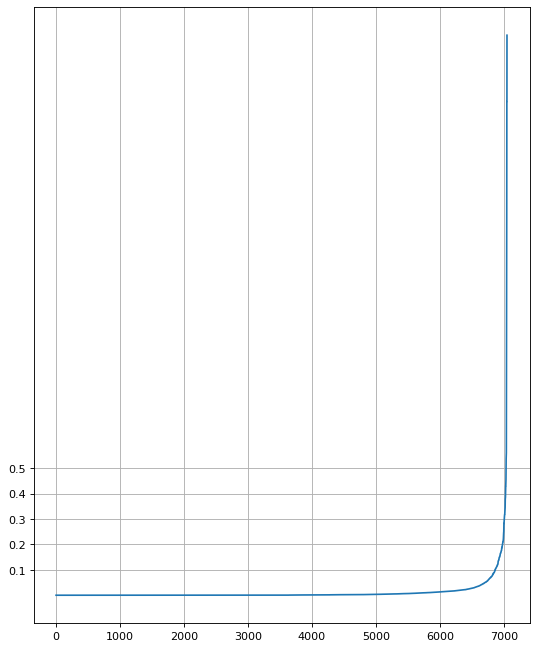

In [110]:
neighbours = NearestNeighbors(n_neighbors=2)
distances, indices = neighbours.fit(X_reduced).kneighbors(X_reduced)

distances = distances[:, 1]
distances = np.sort(distances, axis=0)
plt.figure(figsize=(8, 10), dpi=80)
x_ticks = [0.1, 0.2, 0.3, 0.4, 0.5]

plt.yticks(ticks=x_ticks, labels = x_ticks)
plt.grid()
plt.plot(distances)

In [111]:
epsilon = 0.1
minimum_samples = 5
db_reduced = DBSCAN(eps=epsilon, min_samples=minimum_samples).fit(X_reduced)
y_reduced_dbscan = DBSCAN(eps=epsilon, min_samples=minimum_samples).fit_predict(X_reduced)
labels = db_reduced.labels_
labels

array([-1,  0,  0, ...,  0,  0,  0])

In [112]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db_reduced.core_sample_indices_] = True
core_samples_mask

array([False,  True,  True, ...,  True,  True,  True])

In [113]:
n_clusters_ = len(set(labels))-(1 if -1 in labels else 0)
n_clusters_

7

In [114]:
unique_labels = set(labels)
unique_labels

{-1, 0, 1, 2, 3, 4, 5, 6}

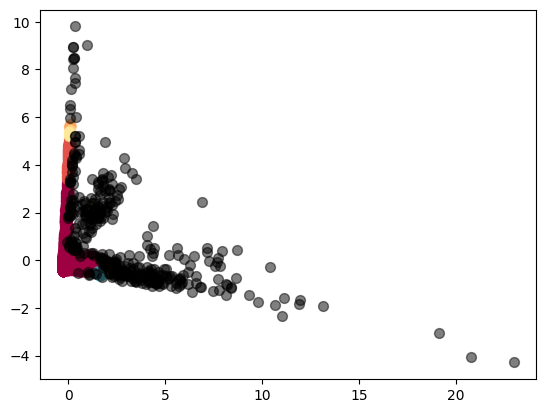

In [115]:
for k, col in zip(unique_labels, colors):
    if k== -1:
        #noise
        col = 'k'
        
    class_member_mask = (labels==k)

    #plot datapoints of clusters
    xy_reduced = X_reduced[class_member_mask & core_samples_mask]
    plt.scatter(xy_reduced[:,0], xy_reduced[:,1], s=50, c=[col], marker=u'o', alpha=0.5)
    
    #plot the outliers
    xy_reduced = X_reduced[class_member_mask & ~core_samples_mask]
    plt.scatter(xy_reduced[:,0], xy_reduced[:,1], s=50, c=[col], marker=u'o', alpha=0.5)